<a href="https://colab.research.google.com/github/andreregino/network-science-notebooks/blob/main/LogLogScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start with a network with just one node. Then simulate a Barabasi-Albert process where at each time step you add one new node to the network (m = 1). Repeat until you reach N = 10000.
Plot the degree distribution of the resulting network in log-log scale.

In [1]:
# importing the used libs
import networkx as netx
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress, zscore, norm

In [2]:
G = netx.barabasi_albert_graph(10000, 1, seed=1)
print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))

Number of nodes: 10000
Number of edges: 9999


In [3]:
# function to plot non logarithm graph
def normal_plot(degree_of_network):
  plt.hist(dict(degree_of_network).values(), density=True)

In [15]:
# function to plot log-log scale graph
def plot_degree_histogram(g, normalized=True):
  aux_y = netx.degree_histogram(g)
  y=aux_y.copy()
  aux_x = np.arange(0,len(aux_y)).tolist()
    
  n_nodes = g.number_of_nodes()
    
  if normalized:
    for i in range(len(aux_y)):
      aux_y[i] = aux_y[i]/n_nodes

  # linear regression  
  lm = LinearRegression()
  lm.fit(np.array(aux_x).reshape(-1, 1), (y))
  y_pred = lm.predict(np.array(aux_x).reshape(-1, 1))
  
  # plotting
  fig=plt.figure()
  ax=fig.add_subplot(111, label="1")
  ax2=fig.add_subplot(111, label="2", frame_on=False)
  ax.loglog(aux_x, y, 'x', label='log')
  ax2.plot(np.array(aux_x).reshape(-1, 1), y_pred, color='red', linewidth=3, label="linear")
  ax.legend(loc="upper right")
  ax2.legend(loc="lower left")
  ax.xaxis.set_ticks_position('top')
  ax.yaxis.set_ticks_position('right')
  plt.tight_layout()
  plt.show()

  # finding the slope
  print("Slope of the line:", linregress(aux_x, y_pred).slope)

In [5]:
# function that calculate the degree distribution of the graph
def calculate_degree_distribution(G):
  number_of_nodes = len(G.nodes)
  degree_of_network = G.degree()
  degrees = sorted(dict(degree_of_network).values())
  print("Average degree", sum(degrees) / number_of_nodes)
  normal_plot(degree_of_network)



Plotting non logarithm distribution
Average degree 1.9998


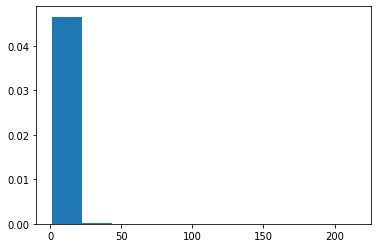

Plotting log log distribution


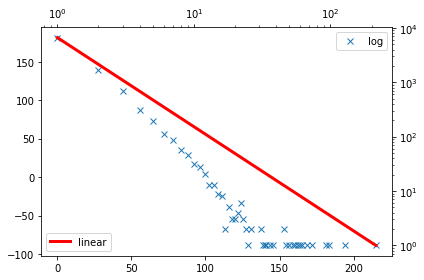

Slope of the line: -1.256268829112041



In [16]:
print("Plotting non logarithm distribution")
calculate_degree_distribution(G)
plt.show()
print("\nPlotting log log distribution")
plot_degree_histogram(G)


Did you get a power law? Yes, plotting it in log log scale and its linear regression it is possible to see that this represents a power-law